<a href="https://colab.research.google.com/github/BilawalBaloch/Projects/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ishank2005/salary-csv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'salary-csv' dataset.
Path to dataset files: /kaggle/input/salary-csv


In [36]:
df = pd.read_csv('/content/archive (2).zip')

In [37]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [38]:
df.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [39]:
df.shape

(35, 2)

In [40]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [42]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


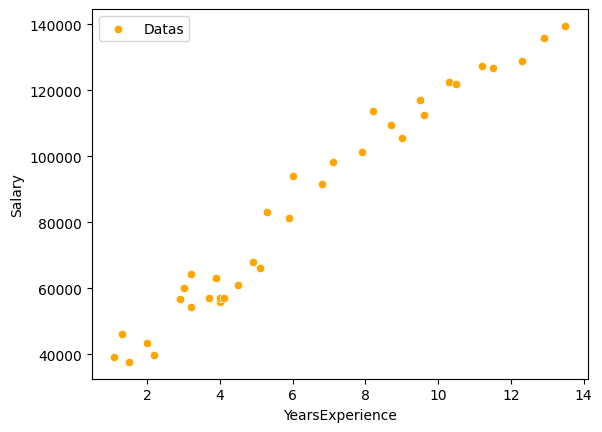

In [43]:
sns.scatterplot(x=df["YearsExperience"],y=df["Salary"],color="orange",label = "Datas")
plt.show()

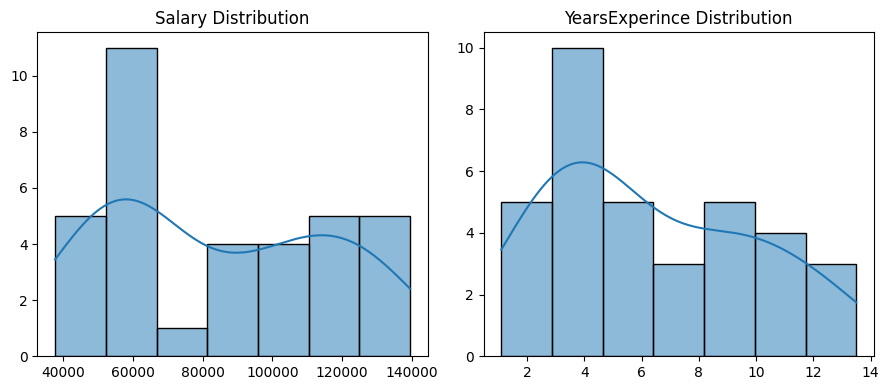

In [44]:
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
sns.histplot(df["Salary"],kde=True)
plt.title("Salary Distribution")
plt.xlabel("")
plt.ylabel("")

plt.subplot(1,2,2)
sns.histplot(df["YearsExperience"],kde=True)
plt.xlabel("")
plt.ylabel("")
plt.title("YearsExperince Distribution")

plt.tight_layout()
plt.show()

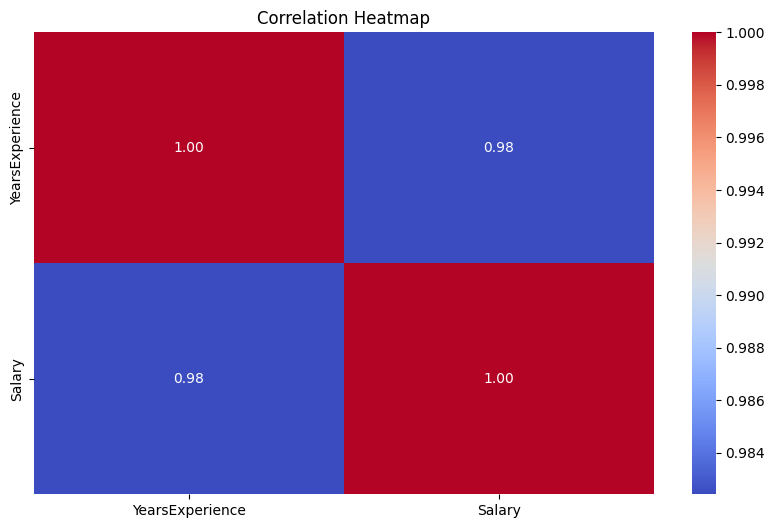

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

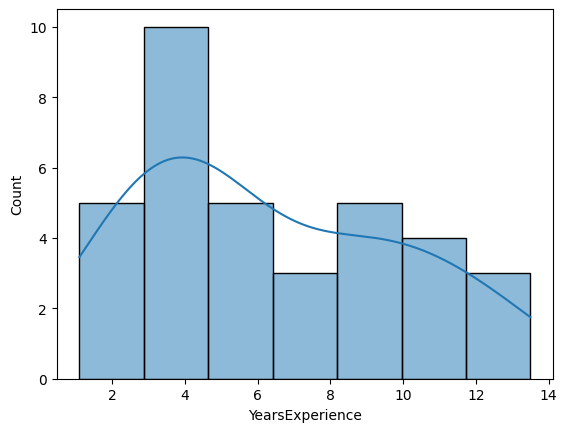

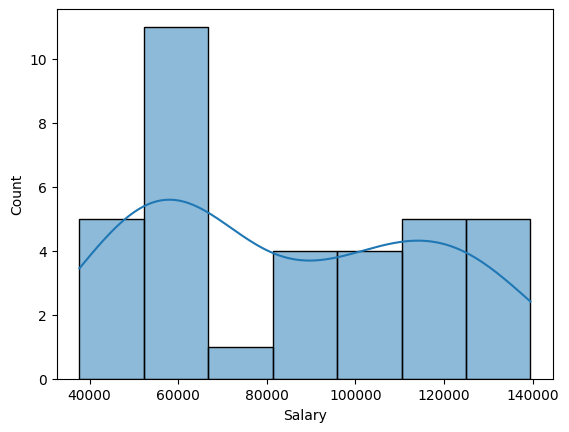

In [53]:
numeric_cols = df.select_dtypes(include=['number']).columns


for col in numeric_cols:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

In [47]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.show()

# **Training the Model**

In [48]:
from sklearn.model_selection import train_test_split
X = df.drop("Salary",axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print("Train Shape :",X_train.shape)
print("Test Shape :",X_test.shape)

Train Shape : (28, 1)
Test Shape : (7, 1)


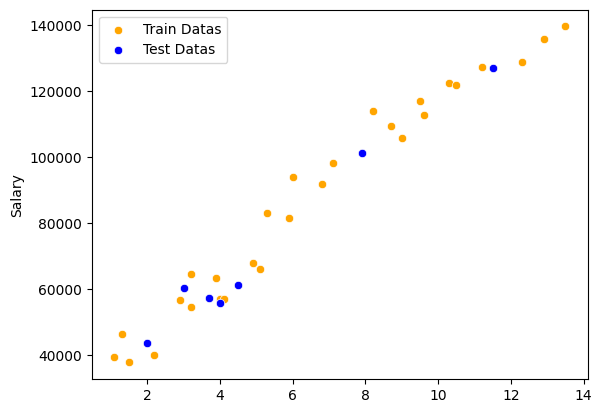

In [49]:
sns.scatterplot(x=X_train.values.ravel(),y=y_train,color="orange",label="Train Datas")
sns.scatterplot(x=X_test.values.ravel(),y=y_test,color="blue",label="Test Datas")
plt.show()

#**Standrizng**

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)

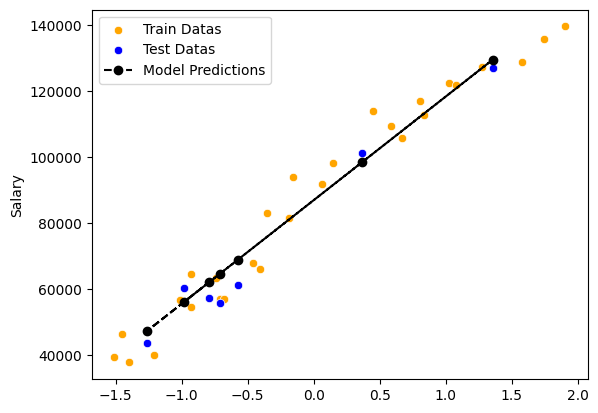

In [52]:
sns.scatterplot(x=X_train.ravel(),y=y_train,color="orange",label="Train Datas")
sns.scatterplot(x=X_test.ravel(),y=y_test,color="blue",label="Test Datas")
plt.plot(X_test,y_pred,color="black",marker='o',linestyle='--',label="Model Predictions")
plt.legend()
plt.show()